In [1]:
# Import libraries
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np  
import statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as sp
import seaborn as sns
sns.set_style('ticks', rc={'axes.grid':True})
sns.set_context('talk')
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from scipy import linalg
import math


In [ ]:
df = pd.read_csv('crimes.csv', sep=',')
df.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
Airbnb2015 = pd.read_csv('id_CA2015.csv',header=None)
Airbnb2017 = pd.read_csv('id_CA2017.csv',header=None)
Airbnb2018 = pd.read_csv('id_CA2018.csv',header=None)
Airbnb2019 = pd.read_csv('id_CA2019.csv',header=None)


Airbnb2015.columns = ['Community Area','Number of Listings']
Airbnb2017.columns = ['Community Area','Number of Listings']
Airbnb2018.columns = ['Community Area','Number of Listings']
Airbnb2019.columns = ['Community Area','Number of Listings']

AirbnbData = pd.DataFrame()
AirbnbData = AirbnbData.append(Airbnb2015)
AirbnbData = AirbnbData.append(Airbnb2017)
AirbnbData = AirbnbData.append(Airbnb2018)
AirbnbData = AirbnbData.append(Airbnb2019)

AirbnbData.head()


In [ ]:
plt.plot(Airbnb2015['Community Area'],Airbnb2015['Number of Listings'],'.')
plt.title('Airbnb listing in chicago in 2015')
plt.xlabel('Community Area');plt.ylabel('Number of Listings')
plt.show()

In [ ]:
plt.plot(Airbnb2017['Community Area'],Airbnb2017['Number of Listings'],'.')
plt.title('Airbnb listing in chicago in 2017')
plt.xlabel('Community Area');plt.ylabel('Number of Listing')
plt.show()

In [ ]:
plt.plot(Airbnb2018['Community Area'],Airbnb2018['Number of Listings'],'.')
plt.title('Airbnb listing in chicago in 2018')
plt.xlabel('Community Area');plt.ylabel('Number of Listings')
plt.show()

In [ ]:
plt.plot(Airbnb2019['Community Area'],Airbnb2019['Number of Listings'],'.')
plt.title('Airbnb listing in chicago in 2019')
plt.xlabel('Community Area');plt.ylabel('Number of Listings')
plt.show()

In [ ]:
plt.plot(Airbnb2018['Community Area'],Airbnb2018['Number of Listings'],'.')
plt.plot(Airbnb2015['Community Area'],Airbnb2015['Number of Listings'],'.')
plt.plot(Airbnb2017['Community Area'],Airbnb2017['Number of Listings'],'.')
plt.plot(Airbnb2019['Community Area'],Airbnb2019['Number of Listings'],'.')
plt.title('Airbnb listing in chicago from 2015-2019')
plt.legend(['2018','2015','2017','2019'])
plt.xlabel('Community Area');plt.ylabel('Number of Listings')
plt.show()

In [ ]:
df_new = pd.DataFrame(df, columns = ['Date', 'Year', 'Primary Type', 'Community Area'])
df_new.head()


In [24]:
df_new = df_new.sort_values(by='Date')
df_new.head()


,Date,Year,Primary Type,Community Area
2807580,01/01/2001 01:00:00 AM,2001,OFFENSE INVOLVING CHILDREN,58.0
1316531,01/01/2001 01:00:00 AM,2001,CRIM SEXUAL ASSAULT,NaN
4212964,01/01/2001 01:00:00 AM,2001,OFFENSE INVOLVING CHILDREN,40.0
1318138,01/01/2001 01:00:00 AM,2001,CRIMINAL DAMAGE,NaN
1325294,01/01/2001 01:00:00 AM,2001,DECEPTIVE PRACTICE,NaN


In [25]:
df_new = df_new.dropna()
df_new.head()

,Date,Year,Primary Type,Community Area
2807580,01/01/2001 01:00:00 AM,2001,OFFENSE INVOLVING CHILDREN,58.0
4212964,01/01/2001 01:00:00 AM,2001,OFFENSE INVOLVING CHILDREN,40.0
2803265,01/01/2001 01:00:00 AM,2001,CRIM SEXUAL ASSAULT,70.0
4621490,01/01/2001 01:00:00 PM,2001,THEFT,66.0
3222250,01/01/2001 01:00:00 PM,2001,THEFT,53.0


In [26]:
index = df_new[df_new['Year'] < 2015].index
df_new.drop(index , inplace=True)
df_new.head()

,Date,Year,Primary Type,Community Area
6981290,01/01/2015 01:00:00 AM,2015,OTHER OFFENSE,60.0
6972637,01/01/2015 01:00:00 AM,2015,THEFT,33.0
6971761,01/01/2015 01:00:00 AM,2015,CRIMINAL DAMAGE,45.0
6971527,01/01/2015 01:00:00 AM,2015,BATTERY,19.0
6971925,01/01/2015 01:00:00 AM,2015,THEFT,6.0


In [27]:
df_2015 = df_new[df_new['Year'] == 2015]
df_2015 = df_2015.sort_values(by='Community Area')
df_2015_0 = df_2015.loc[df['Community Area'] == 0.0]
temp = df_2015_0['Primary Type'].value_counts()
a = []
foo = df_new['Primary Type'].value_counts()

for index, val in foo.iteritems():
    a.append(index)
b = []

for i in range (0,33):
    bool = 1
    for index, val in temp.iteritems():
        if a[i] == index:
            b.append(val)
            bool = 1
            break
        else:
            bool = 0
    if bool == 0:
        b.append(0)
len(b)

33

In [28]:
df_2015 = df_new[df_new['Year'] == 2015]
df_2015 = df_2015.sort_values(by='Community Area')

a = []
foo = df_new['Primary Type'].value_counts()
for index, val in foo.iteritems():
    a.append(index)

data2015 = pd.DataFrame()
for k in range(0,77):
    df_2015_i = df_2015.loc[df['Community Area'] == k]
    temp = df_2015_i['Primary Type'].value_counts()
    b = []
    for i in range (0,33):
        bool = 1
        for index, val in temp.iteritems():
            if a[i] == index:
                b.append(val)
                bool = 1
                break
            else:
                bool = 0
        if bool == 0:
            b.append(0)
    newb = pd.DataFrame(b)
    newb = newb.T
    data2015 = data2015.append(newb)
    
data2015 = data2015.reset_index(drop=True)
data2015 = data2015.drop(data2015.columns[32], axis=1);
data2015.columns = ['THEFT','BATTERY','CRIMINAL DAMAGE','NARCOTICS','OTHER OFFENSE','ASSAULT','DECEPTIVE PRACTICE','BURGLARY',
           'MOTOR VEHICLE THEFT','ROBBERY','CRIMINAL TRESPASS','WEAPONS VIOLATION','PUBLIC PEACE VIOLATION',
           'OFFENSE INVOLVING CHILDREN','CRIM SEXUAL ASSAULT','PROSTITUTION','INTERFERENCE WITH PUBLIC OFFICER','SEX OFFENSE',
           'HOMICIDE','ARSON','GAMBLING','LIQUOR LAW VIOLATION','KIDNAPPING','STALKING','INTIMIDATION','OBSCENITY',
           'CONCEALED CARRY LICENSE VIOLATION','NON - CRIMINAL','NON-CRIMINAL','PUBLIC INDECENCY','HUMAN TRAFFICKING',
           'OTHER NARCOTIC VIOLATION']
data2015.head()

,THEFT,BATTERY,CRIMINAL DAMAGE,NARCOTICS,OTHER OFFENSE,ASSAULT,DECEPTIVE PRACTICE,BURGLARY,MOTOR VEHICLE THEFT,ROBBERY,...,KIDNAPPING,STALKING,INTIMIDATION,OBSCENITY,CONCEALED CARRY LICENSE VIOLATION,NON - CRIMINAL,NON-CRIMINAL,PUBLIC INDECENCY,HUMAN TRAFFICKING,OTHER NARCOTIC VIOLATION
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,855,675,446,238,234,242,219,166,113,106,...,3,0,1,0,0,0,0,0,0,0
2,683,553,434,168,199,236,160,238,123,91,...,0,0,1,1,1,0,0,1,0,0
3,886,674,325,236,331,223,286,119,155,115,...,0,2,2,0,0,0,0,0,0,0
4,504,289,237,99,147,106,79,89,58,42,...,1,1,1,0,0,0,0,0,1,0


Text(0, 0.5, 'Number of Crimes')

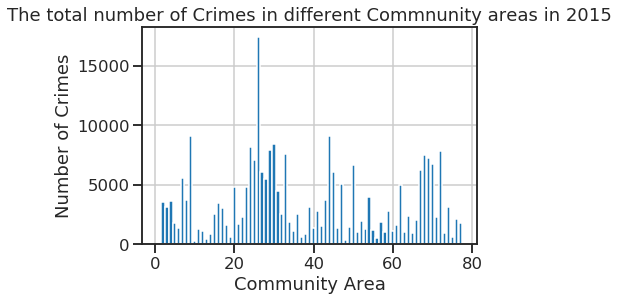

In [97]:
totalcrime2015 = []
for i in range(len(data2015)):
    comm_crime =  sum(data2015.iloc[i,:])
    totalcrime2015.append(comm_crime)
plt.bar(Airbnb2015['Community Area'],totalcrime2015)
plt.title('The total number of Crimes in different Commnunity areas in 2015')
plt.xlabel('Community Area');plt.ylabel('Number of Crimes')

In [29]:
train2015 = data2015.copy()
train2015['Number of Listings'] = Airbnb2015['Number of Listings'].values
train2015.head()

,THEFT,BATTERY,CRIMINAL DAMAGE,NARCOTICS,OTHER OFFENSE,ASSAULT,DECEPTIVE PRACTICE,BURGLARY,MOTOR VEHICLE THEFT,ROBBERY,...,STALKING,INTIMIDATION,OBSCENITY,CONCEALED CARRY LICENSE VIOLATION,NON - CRIMINAL,NON-CRIMINAL,PUBLIC INDECENCY,HUMAN TRAFFICKING,OTHER NARCOTIC VIOLATION,Number of Listings
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,130
1,855,675,446,238,234,242,219,166,113,106,...,0,1,0,0,0,0,0,0,0,50
2,683,553,434,168,199,236,160,238,123,91,...,0,1,1,1,0,0,1,0,0,235
3,886,674,325,236,331,223,286,119,155,115,...,2,2,0,0,0,0,0,0,0,112
4,504,289,237,99,147,106,79,89,58,42,...,1,1,0,0,0,0,0,1,0,105


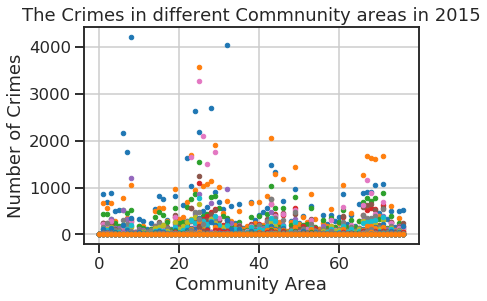

In [59]:
plt.plot(data2015,'.')
plt.title('The Crimes in different Commnunity areas in 2015')
plt.xlabel('Community Area');plt.ylabel('Number of Crimes')
plt.show()

In [31]:
df_2016 = df_new[df_new['Year'] == 2016]
df_2016 = df_2016.sort_values(by='Community Area')

a = []
foo = df_new['Primary Type'].value_counts()
for index, val in foo.iteritems():
    a.append(index)

data2016 = pd.DataFrame()
for k in range(0,77):
    df_2015_i = df_2016.loc[df['Community Area'] == k]
    temp = df_2015_i['Primary Type'].value_counts()
    b = []
    for i in range (0,33):
        bool = 1
        for index, val in temp.iteritems():
            if a[i] == index:
                b.append(val)
                bool = 1
                break
            else:
                bool = 0
        if bool == 0:
            b.append(0)
    newb = pd.DataFrame(b)
    newb = newb.T
    data2016 = data2016.append(newb)
    
data2016 = data2016.reset_index(drop=True)
data2016 = data2016.drop(data2016.columns[32], axis=1);
data2016.columns = ['THEFT','BATTERY','CRIMINAL DAMAGE','NARCOTICS','OTHER OFFENSE','ASSAULT','DECEPTIVE PRACTICE','BURGLARY',
           'MOTOR VEHICLE THEFT','ROBBERY','CRIMINAL TRESPASS','WEAPONS VIOLATION','PUBLIC PEACE VIOLATION',
           'OFFENSE INVOLVING CHILDREN','CRIM SEXUAL ASSAULT','PROSTITUTION','INTERFERENCE WITH PUBLIC OFFICER','SEX OFFENSE',
           'HOMICIDE','ARSON','GAMBLING','LIQUOR LAW VIOLATION','KIDNAPPING','STALKING','INTIMIDATION','OBSCENITY',
           'CONCEALED CARRY LICENSE VIOLATION','NON - CRIMINAL','NON-CRIMINAL','PUBLIC INDECENCY','HUMAN TRAFFICKING',
           'OTHER NARCOTIC VIOLATION']
data2016.head()

,THEFT,BATTERY,CRIMINAL DAMAGE,NARCOTICS,OTHER OFFENSE,ASSAULT,DECEPTIVE PRACTICE,BURGLARY,MOTOR VEHICLE THEFT,ROBBERY,...,KIDNAPPING,STALKING,INTIMIDATION,OBSCENITY,CONCEALED CARRY LICENSE VIOLATION,NON - CRIMINAL,NON-CRIMINAL,PUBLIC INDECENCY,HUMAN TRAFFICKING,OTHER NARCOTIC VIOLATION
0,915,760,403,234,262,234,91,183,112,159,...,4,1,1,0,2,0,0,1,0,0
1,734,553,463,203,289,225,89,195,165,127,...,2,6,2,0,3,1,0,0,0,0
2,1015,679,306,252,359,189,116,136,108,144,...,1,1,0,0,1,3,0,0,0,0
3,531,295,249,96,254,136,42,117,79,52,...,2,4,1,1,1,1,0,0,0,0
4,474,121,164,59,210,64,29,109,58,48,...,1,1,3,0,1,0,0,0,0,0


In [33]:
df_2017 = df_new[df_new['Year'] == 2017]
df_2017 = df_2017.sort_values(by='Community Area')

a = []
foo = df_new['Primary Type'].value_counts()
for index, val in foo.iteritems():
    a.append(index)

data2017 = pd.DataFrame()
for k in range(0,77):
    df_2015_i = df_2017.loc[df['Community Area'] == k]
    temp = df_2015_i['Primary Type'].value_counts()
    b = []
    for i in range (0,33):
        bool = 1
        for index, val in temp.iteritems():
            if a[i] == index:
                b.append(val)
                bool = 1
                break
            else:
                bool = 0
        if bool == 0:
            b.append(0)
    newb = pd.DataFrame(b)
    newb = newb.T
    data2017 = data2017.append(newb)
    
data2017 = data2017.reset_index(drop=True)
data2017 = data2017.drop(data2017.columns[32], axis=1);
data2017.columns = ['THEFT','BATTERY','CRIMINAL DAMAGE','NARCOTICS','OTHER OFFENSE','ASSAULT','DECEPTIVE PRACTICE','BURGLARY',
           'MOTOR VEHICLE THEFT','ROBBERY','CRIMINAL TRESPASS','WEAPONS VIOLATION','PUBLIC PEACE VIOLATION',
           'OFFENSE INVOLVING CHILDREN','CRIM SEXUAL ASSAULT','PROSTITUTION','INTERFERENCE WITH PUBLIC OFFICER','SEX OFFENSE',
           'HOMICIDE','ARSON','GAMBLING','LIQUOR LAW VIOLATION','KIDNAPPING','STALKING','INTIMIDATION','OBSCENITY',
           'CONCEALED CARRY LICENSE VIOLATION','NON - CRIMINAL','NON-CRIMINAL','PUBLIC INDECENCY','HUMAN TRAFFICKING',
           'OTHER NARCOTIC VIOLATION']
data2017.head()

,THEFT,BATTERY,CRIMINAL DAMAGE,NARCOTICS,OTHER OFFENSE,ASSAULT,DECEPTIVE PRACTICE,BURGLARY,MOTOR VEHICLE THEFT,ROBBERY,...,KIDNAPPING,STALKING,INTIMIDATION,OBSCENITY,CONCEALED CARRY LICENSE VIOLATION,NON - CRIMINAL,NON-CRIMINAL,PUBLIC INDECENCY,HUMAN TRAFFICKING,OTHER NARCOTIC VIOLATION
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1212,703,586,268,273,220,68,182,122,168,...,1,2,2,0,1,0,0,0,1,0
2,915,589,485,242,303,249,52,193,191,115,...,3,4,2,0,0,0,0,0,0,0
3,968,663,318,275,402,210,70,160,105,103,...,1,1,3,0,0,0,0,0,0,0
4,616,288,200,125,226,113,33,109,86,63,...,3,2,2,0,1,0,0,0,0,0


In [34]:
train2017 = data2017.copy()
train2017['Number of Listings'] = Airbnb2017['Number of Listings'].values
train2017.head()


,THEFT,BATTERY,CRIMINAL DAMAGE,NARCOTICS,OTHER OFFENSE,ASSAULT,DECEPTIVE PRACTICE,BURGLARY,MOTOR VEHICLE THEFT,ROBBERY,...,STALKING,INTIMIDATION,OBSCENITY,CONCEALED CARRY LICENSE VIOLATION,NON - CRIMINAL,NON-CRIMINAL,PUBLIC INDECENCY,HUMAN TRAFFICKING,OTHER NARCOTIC VIOLATION,Number of Listings
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,137
1,1212,703,586,268,273,220,68,182,122,168,...,2,2,0,1,0,0,0,1,0,70
2,915,589,485,242,303,249,52,193,191,115,...,4,2,0,0,0,0,0,0,0,208
3,968,663,318,275,402,210,70,160,105,103,...,1,3,0,0,0,0,0,0,0,93
4,616,288,200,125,226,113,33,109,86,63,...,2,2,0,1,0,0,0,0,0,112


Text(0, 0.5, 'Number of Crimes')

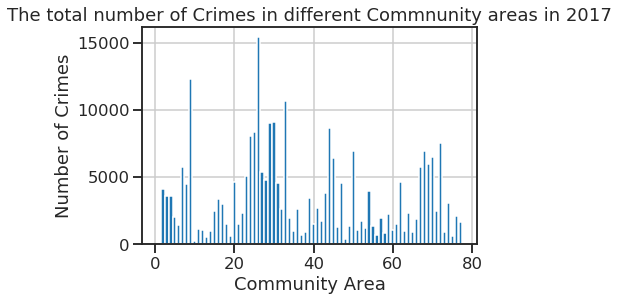

In [98]:
totalcrime2017 = []
for i in range(len(data2017)):
    comm_crime =  sum(data2017.iloc[i,:])
    totalcrime2017.append(comm_crime)
plt.bar(Airbnb2015['Community Area'],totalcrime2017)
plt.title('The total number of Crimes in different Commnunity areas in 2017')
plt.xlabel('Community Area');plt.ylabel('Number of Crimes')

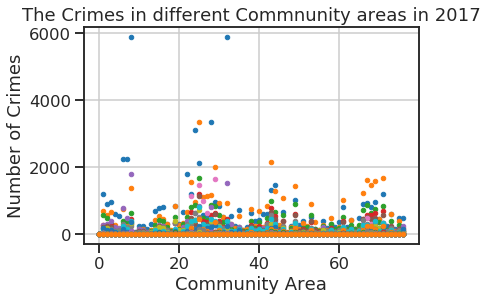

In [73]:
plt.plot(data2017,'.')
plt.title('The Crimes in different Commnunity areas in 2017')
plt.xlabel('Community Area');plt.ylabel('Number of Crimes')
plt.show()

In [36]:
df_2018 = df_new[df_new['Year'] == 2018]
df_2018 = df_2018.sort_values(by='Community Area')

a = []
foo = df_new['Primary Type'].value_counts()
for index, val in foo.iteritems():
    a.append(index)

data2018 = pd.DataFrame()
for k in range(0,77):
    df_2015_i = df_2018.loc[df['Community Area'] == k]
    temp = df_2015_i['Primary Type'].value_counts()
    b = []
    for i in range (0,33):
        bool = 1
        for index, val in temp.iteritems():
            if a[i] == index:
                b.append(val)
                bool = 1
                break
            else:
                bool = 0
        if bool == 0:
            b.append(0)
    newb = pd.DataFrame(b)
    newb = newb.T
    data2018 = data2018.append(newb)

data2018 = data2018.reset_index(drop=True)
data2018 = data2018.drop(data2018.columns[32], axis=1);
data2018.columns = ['THEFT','BATTERY','CRIMINAL DAMAGE','NARCOTICS','OTHER OFFENSE','ASSAULT','DECEPTIVE PRACTICE','BURGLARY',
           'MOTOR VEHICLE THEFT','ROBBERY','CRIMINAL TRESPASS','WEAPONS VIOLATION','PUBLIC PEACE VIOLATION',
           'OFFENSE INVOLVING CHILDREN','CRIM SEXUAL ASSAULT','PROSTITUTION','INTERFERENCE WITH PUBLIC OFFICER','SEX OFFENSE',
           'HOMICIDE','ARSON','GAMBLING','LIQUOR LAW VIOLATION','KIDNAPPING','STALKING','INTIMIDATION','OBSCENITY',
           'CONCEALED CARRY LICENSE VIOLATION','NON - CRIMINAL','NON-CRIMINAL','PUBLIC INDECENCY','HUMAN TRAFFICKING',
           'OTHER NARCOTIC VIOLATION']
data2018.head()

,THEFT,BATTERY,CRIMINAL DAMAGE,NARCOTICS,OTHER OFFENSE,ASSAULT,DECEPTIVE PRACTICE,BURGLARY,MOTOR VEHICLE THEFT,ROBBERY,...,KIDNAPPING,STALKING,INTIMIDATION,OBSCENITY,CONCEALED CARRY LICENSE VIOLATION,NON - CRIMINAL,NON-CRIMINAL,PUBLIC INDECENCY,HUMAN TRAFFICKING,OTHER NARCOTIC VIOLATION
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1078,732,470,286,233,212,68,174,102,144,...,3,1,1,0,1,1,0,0,0,0
2,811,619,443,264,292,261,53,260,171,133,...,3,3,4,1,3,0,0,0,0,0
3,992,714,302,258,397,212,68,176,123,106,...,1,1,3,0,2,0,0,0,0,0
4,554,324,205,114,211,118,36,129,77,39,...,2,0,5,0,0,1,0,0,0,0


In [37]:
train2018 = data2018.copy()
train2018['Number of Listings'] = Airbnb2018['Number of Listings'].values
train2018.head()

,THEFT,BATTERY,CRIMINAL DAMAGE,NARCOTICS,OTHER OFFENSE,ASSAULT,DECEPTIVE PRACTICE,BURGLARY,MOTOR VEHICLE THEFT,ROBBERY,...,STALKING,INTIMIDATION,OBSCENITY,CONCEALED CARRY LICENSE VIOLATION,NON - CRIMINAL,NON-CRIMINAL,PUBLIC INDECENCY,HUMAN TRAFFICKING,OTHER NARCOTIC VIOLATION,Number of Listings
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,263
1,1078,732,470,286,233,212,68,174,102,144,...,1,1,0,1,1,0,0,0,0,134
2,811,619,443,264,292,261,53,260,171,133,...,3,4,1,3,0,0,0,0,0,431
3,992,714,302,258,397,212,68,176,123,106,...,1,3,0,2,0,0,0,0,0,183
4,554,324,205,114,211,118,36,129,77,39,...,0,5,0,0,1,0,0,0,0,213


Text(0, 0.5, 'Number of Crimes')

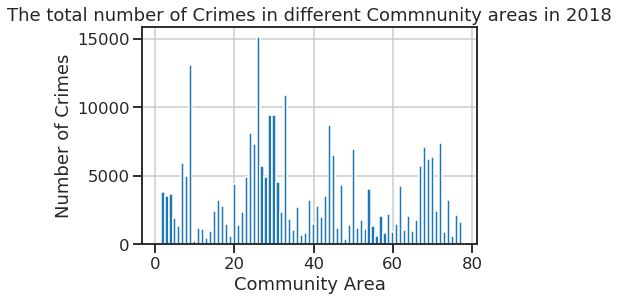

In [100]:
totalcrime2018 = []
for i in range(len(data2018)):
    comm_crime =  sum(data2018.iloc[i,:])
    totalcrime2018.append(comm_crime)
plt.bar(Airbnb2015['Community Area'],totalcrime2018)
plt.title('The total number of Crimes in different Commnunity areas in 2018')
plt.xlabel('Community Area');plt.ylabel('Number of Crimes')

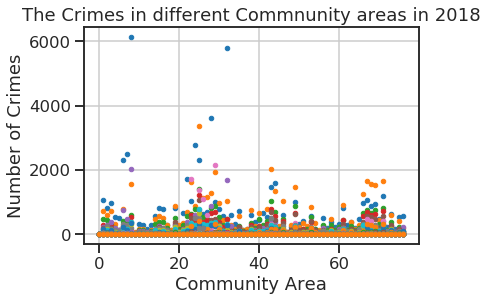

In [74]:
plt.plot(data2018,'.')
plt.title('The Crimes in different Commnunity areas in 2018')
plt.xlabel('Community Area');plt.ylabel('Number of Crimes')
plt.show()

In [39]:
df_2019 = df_new[df_new['Year'] == 2019]
df_2019 = df_2019.sort_values(by='Community Area')

a = []
foo = df_new['Primary Type'].value_counts()
for index, val in foo.iteritems():
    a.append(index)

data2019 = pd.DataFrame()
for k in range(0,77):
    df_2015_i = df_2019.loc[df['Community Area'] == k]
    temp = df_2015_i['Primary Type'].value_counts()
    b = []
    for i in range (0,33):
        bool = 1
        for index, val in temp.iteritems():
            if a[i] == index:
                b.append(val)
                bool = 1
                break
            else:
                bool = 0
        if bool == 0:
            b.append(0)
    newb = pd.DataFrame(b)
    newb = newb.T
    data2019 = data2019.append(newb)
    
data2019 = data2019.reset_index(drop=True)
data2019 = data2019.drop(data2019.columns[32], axis=1);
data2019.columns = ['THEFT','BATTERY','CRIMINAL DAMAGE','NARCOTICS','OTHER OFFENSE','ASSAULT','DECEPTIVE PRACTICE','BURGLARY',
           'MOTOR VEHICLE THEFT','ROBBERY','CRIMINAL TRESPASS','WEAPONS VIOLATION','PUBLIC PEACE VIOLATION',
           'OFFENSE INVOLVING CHILDREN','CRIM SEXUAL ASSAULT','PROSTITUTION','INTERFERENCE WITH PUBLIC OFFICER','SEX OFFENSE',
           'HOMICIDE','ARSON','GAMBLING','LIQUOR LAW VIOLATION','KIDNAPPING','STALKING','INTIMIDATION','OBSCENITY',
           'CONCEALED CARRY LICENSE VIOLATION','NON - CRIMINAL','NON-CRIMINAL','PUBLIC INDECENCY','HUMAN TRAFFICKING',
           'OTHER NARCOTIC VIOLATION']

data2019.head()

,THEFT,BATTERY,CRIMINAL DAMAGE,NARCOTICS,OTHER OFFENSE,ASSAULT,DECEPTIVE PRACTICE,BURGLARY,MOTOR VEHICLE THEFT,ROBBERY,...,KIDNAPPING,STALKING,INTIMIDATION,OBSCENITY,CONCEALED CARRY LICENSE VIOLATION,NON - CRIMINAL,NON-CRIMINAL,PUBLIC INDECENCY,HUMAN TRAFFICKING,OTHER NARCOTIC VIOLATION
0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1087,661,435,251,235,208,89,168,122,105,...,6,1,1,0,5,0,0,0,0,0
2,831,534,363,201,270,215,61,182,108,79,...,1,2,1,1,0,0,0,0,0,0
3,839,603,258,252,334,170,56,99,78,66,...,0,0,1,1,1,0,0,0,0,0
4,470,282,180,109,162,83,22,91,54,25,...,4,2,1,0,0,0,0,0,0,0


In [40]:
train2019 = data2019.copy()
train2019['Number of Listings'] = Airbnb2019['Number of Listings'].values
train2019.head()

,THEFT,BATTERY,CRIMINAL DAMAGE,NARCOTICS,OTHER OFFENSE,ASSAULT,DECEPTIVE PRACTICE,BURGLARY,MOTOR VEHICLE THEFT,ROBBERY,...,STALKING,INTIMIDATION,OBSCENITY,CONCEALED CARRY LICENSE VIOLATION,NON - CRIMINAL,NON-CRIMINAL,PUBLIC INDECENCY,HUMAN TRAFFICKING,OTHER NARCOTIC VIOLATION,Number of Listings
0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,263
1,1087,661,435,251,235,208,89,168,122,105,...,1,1,0,5,0,0,0,0,0,124
2,831,534,363,201,270,215,61,182,108,79,...,2,1,1,0,0,0,0,0,0,410
3,839,603,258,252,334,170,56,99,78,66,...,0,1,1,1,0,0,0,0,0,167
4,470,282,180,109,162,83,22,91,54,25,...,2,1,0,0,0,0,0,0,0,220


Text(0, 0.5, 'Number of Crimes')

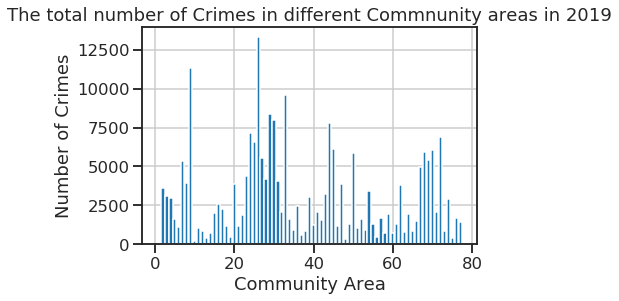

In [101]:
totalcrime2019 = []
for i in range(len(data2019)):
    comm_crime =  sum(data2019.iloc[i,:])
    totalcrime2019.append(comm_crime)
plt.bar(Airbnb2015['Community Area'],totalcrime2019)
plt.title('The total number of Crimes in different Commnunity areas in 2019')
plt.xlabel('Community Area');plt.ylabel('Number of Crimes')

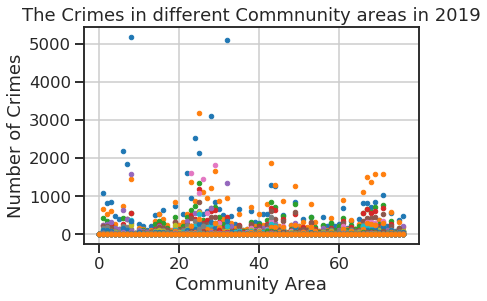

In [75]:
plt.plot(data2019,'.')
plt.title('The Crimes in different Commnunity areas in 2019')
plt.xlabel('Community Area');plt.ylabel('Number of Crimes')
plt.show()

Text(0, 0.5, 'Number of Crimes')

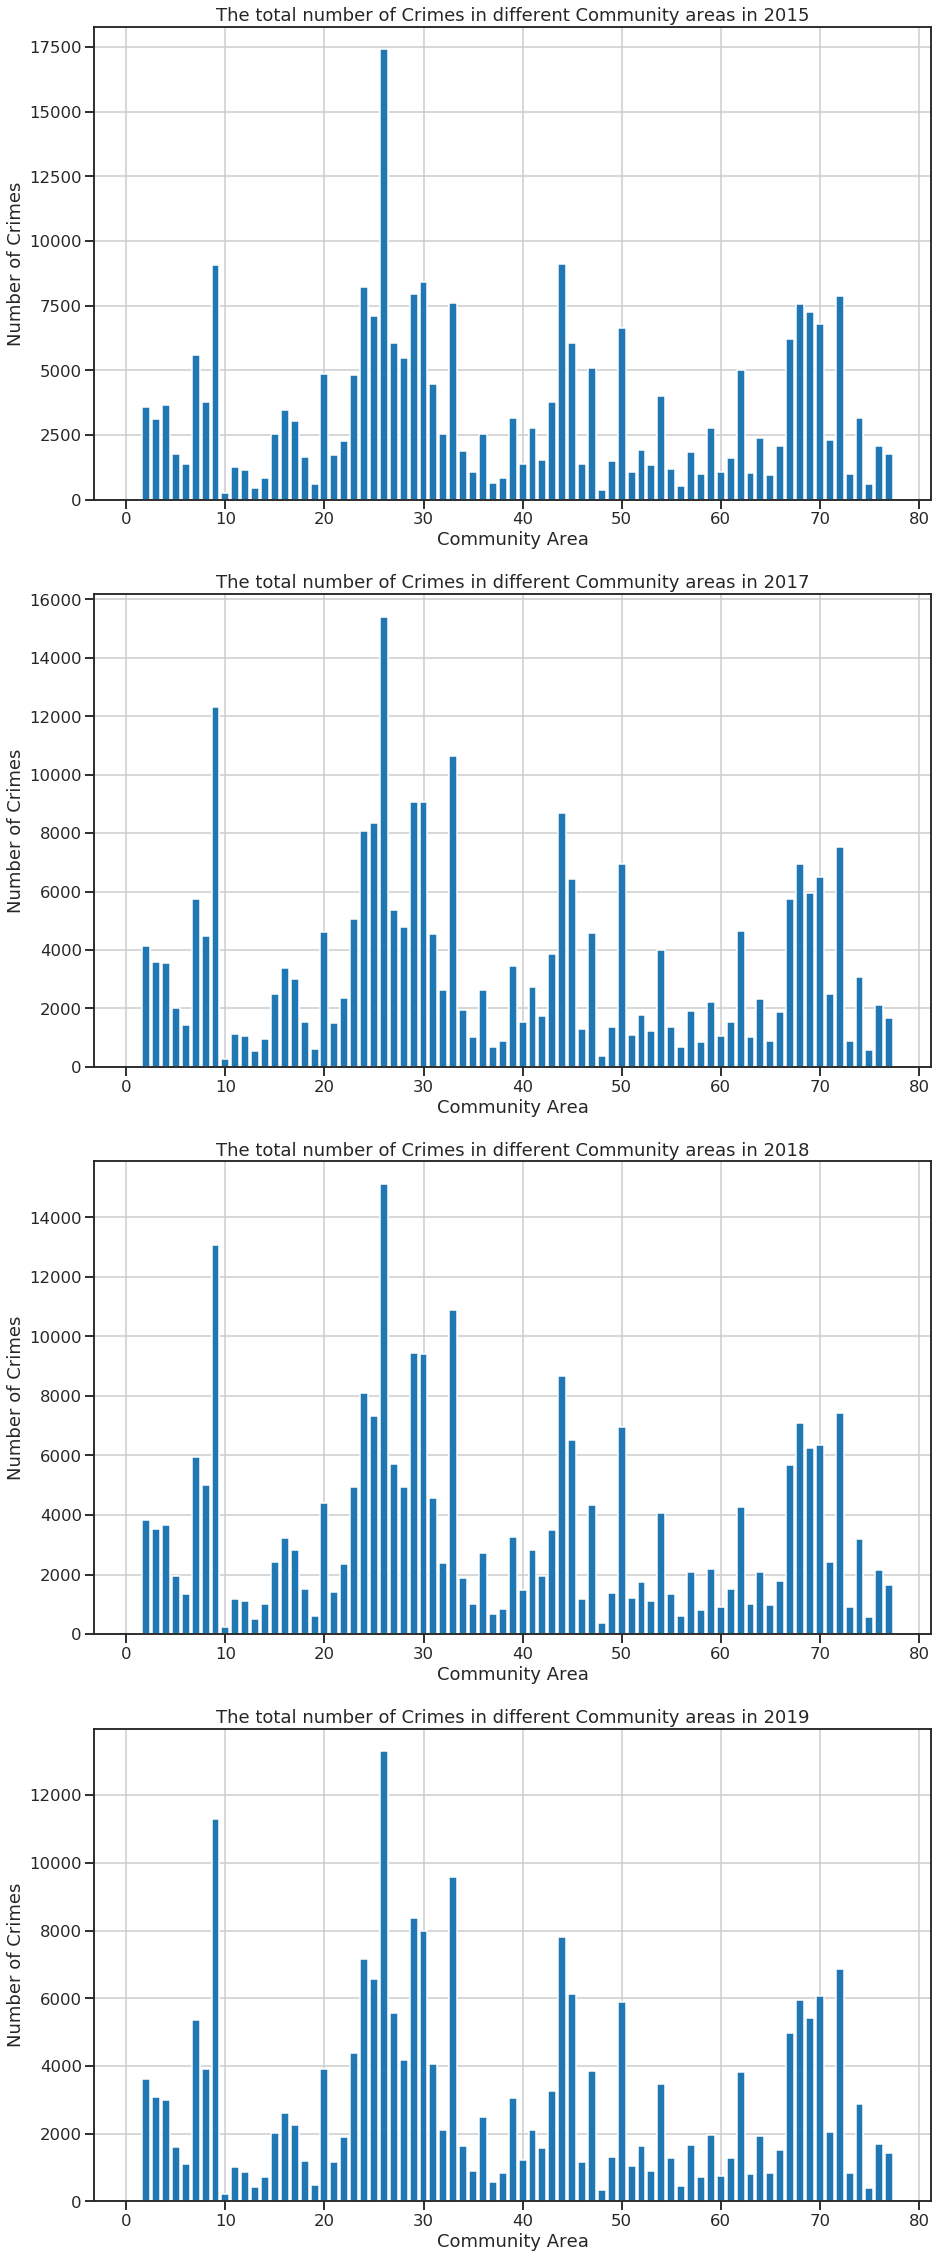

In [145]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15,40))

ax[0].bar(Airbnb2015['Community Area'],totalcrime2015)
ax[0].title.set_text('The total number of Crimes in different Community areas in 2015')
ax[0].set_xlabel('Community Area');ax[0].set_ylabel('Number of Crimes')

ax[1].bar(Airbnb2015['Community Area'],totalcrime2017)
ax[1].title.set_text('The total number of Crimes in different Community areas in 2017')
ax[1].set_xlabel('Community Area');ax[1].set_ylabel('Number of Crimes')

ax[2].bar(Airbnb2015['Community Area'],totalcrime2018)
ax[2].title.set_text('The total number of Crimes in different Community areas in 2018')
ax[2].set_xlabel('Community Area');ax[2].set_ylabel('Number of Crimes')

ax[3].bar(Airbnb2015['Community Area'],totalcrime2019)
ax[3].title.set_text('The total number of Crimes in different Community areas in 2019')
ax[3].set_xlabel('Community Area');ax[3].set_ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Listings')

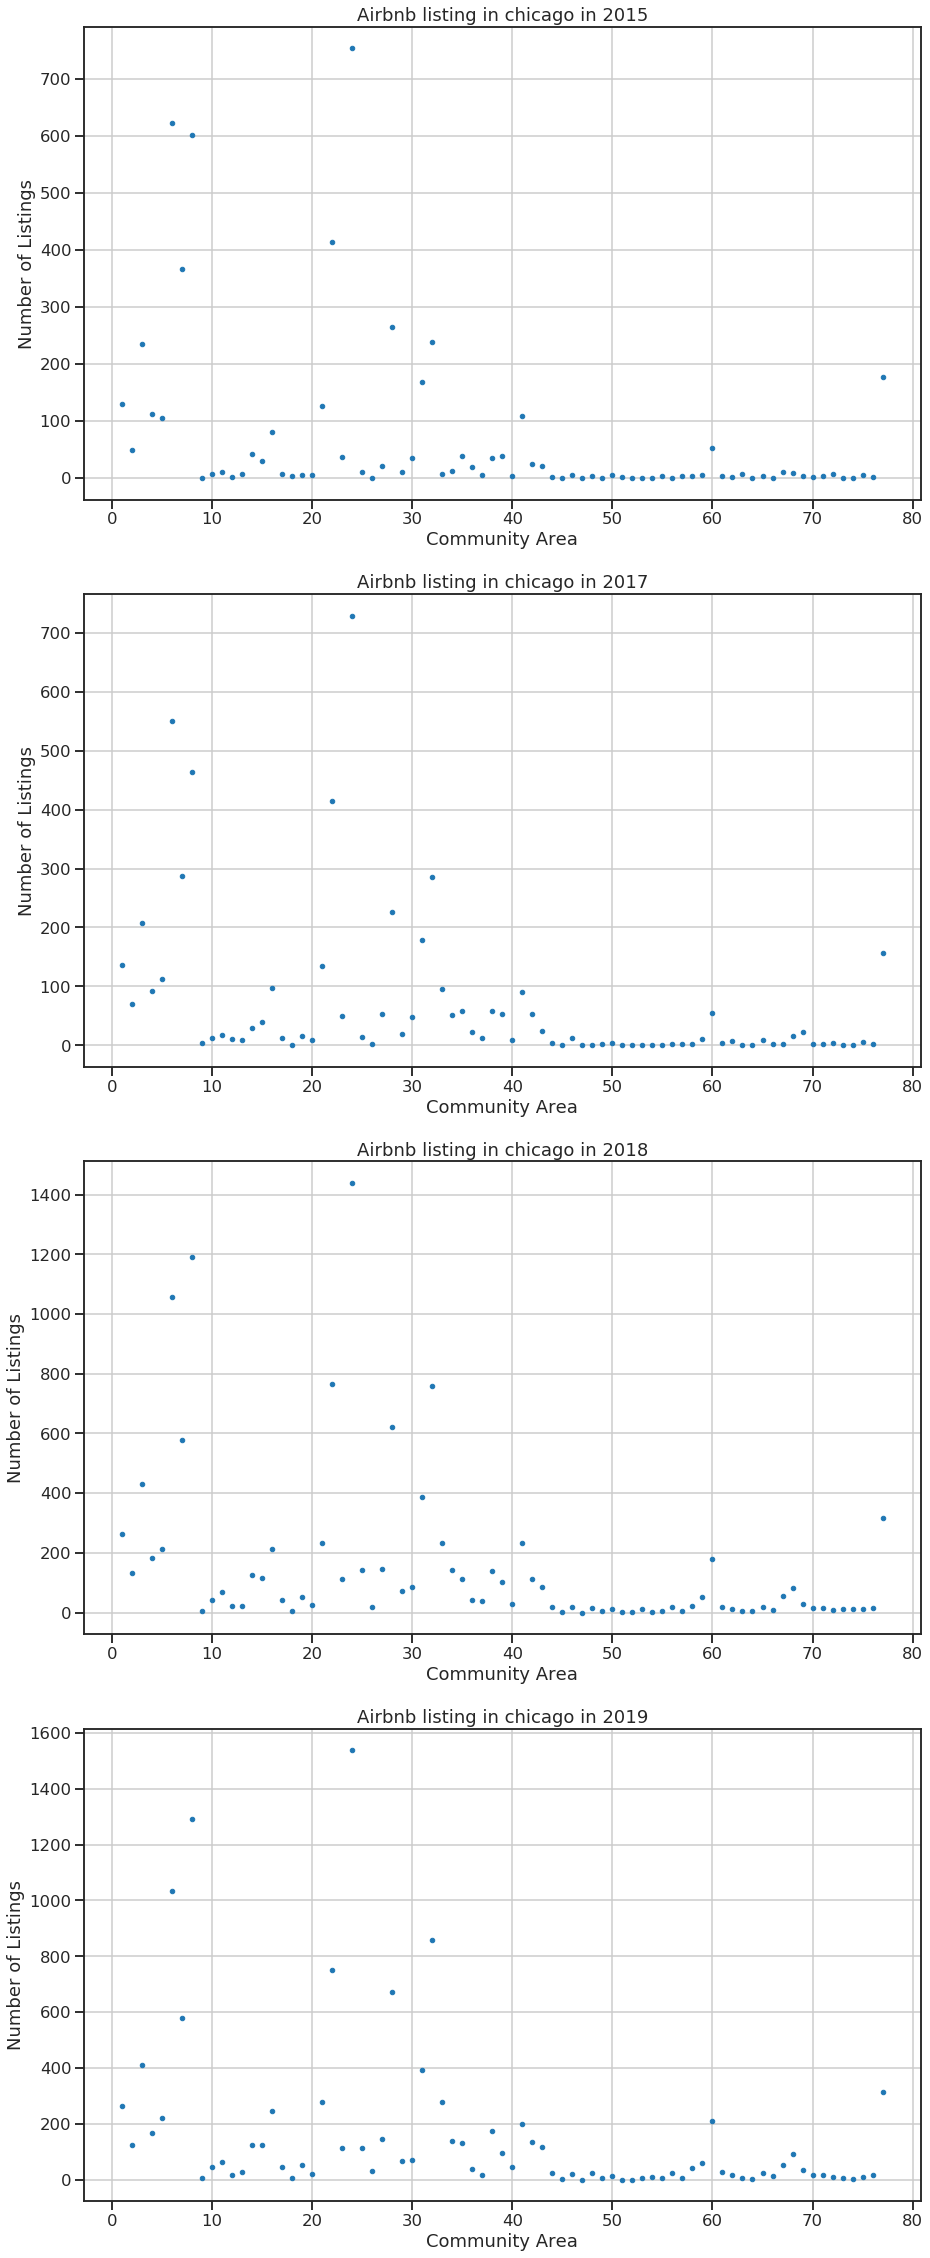

In [133]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15,40))

ax[0].plot(Airbnb2015['Community Area'],Airbnb2015['Number of Listings'],'.')
ax[0].title.set_text('Airbnb listing in chicago in 2015')
ax[0].set_xlabel('Community Area');ax[0].set_ylabel('Number of Listings')

ax[1].plot(Airbnb2017['Community Area'],Airbnb2017['Number of Listings'],'.')
ax[1].title.set_text('Airbnb listing in chicago in 2017')
ax[1].set_xlabel('Community Area');ax[1].set_ylabel('Number of Listings')

ax[2].plot(Airbnb2018['Community Area'],Airbnb2018['Number of Listings'],'.')
ax[2].title.set_text('Airbnb listing in chicago in 2018')
ax[2].set_xlabel('Community Area');ax[2].set_ylabel('Number of Listings')

ax[3].plot(Airbnb2019['Community Area'],Airbnb2019['Number of Listings'],'.')
ax[3].title.set_text('Airbnb listing in chicago in 2019')
ax[3].set_xlabel('Community Area');ax[3].set_ylabel('Number of Listings')


In [102]:
FinalData = pd.DataFrame()
FinalData = FinalData.append(data2015)
FinalData = FinalData.append(data2017)
FinalData = FinalData.append(data2018)
FinalData = FinalData.append(data2019)
FinalData.head()

,THEFT,BATTERY,CRIMINAL DAMAGE,NARCOTICS,OTHER OFFENSE,ASSAULT,DECEPTIVE PRACTICE,BURGLARY,MOTOR VEHICLE THEFT,ROBBERY,...,KIDNAPPING,STALKING,INTIMIDATION,OBSCENITY,CONCEALED CARRY LICENSE VIOLATION,NON - CRIMINAL,NON-CRIMINAL,PUBLIC INDECENCY,HUMAN TRAFFICKING,OTHER NARCOTIC VIOLATION
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,855,675,446,238,234,242,219,166,113,106,...,3,0,1,0,0,0,0,0,0,0
2,683,553,434,168,199,236,160,238,123,91,...,0,0,1,1,1,0,0,1,0,0
3,886,674,325,236,331,223,286,119,155,115,...,0,2,2,0,0,0,0,0,0,0
4,504,289,237,99,147,106,79,89,58,42,...,1,1,1,0,0,0,0,0,1,0


In [151]:
dfAirbnb = AirbnbData['Number of Listings']
#dfHz = sm.add_constant(dfHz)
est = sm.OLS(dfAirbnb,FinalData).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Number of Listings   R-squared (uncentered):                   0.394
Model:                            OLS   Adj. R-squared (uncentered):              0.323
Method:                 Least Squares   F-statistic:                              5.601
Date:                Thu, 05 Dec 2019   Prob (F-statistic):                    2.30e-16
Time:                        22:14:24   Log-Likelihood:                         -2062.3
No. Observations:                 308   AIC:                                      4189.
Df Residuals:                     276   BIC:                                      4308.
Df Model:                          32                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
THEFT                                -0.0512      0.078     -0.654      0.514      -0.205       0.103
BATTERY                              -0.5301      0.189     -2.805      0.005      -0.902      -0.158
CRIMINAL DAMAGE                       0.1827      0.276      0.663      0.508      -0.360       0.725
NARCOTICS                             0.7268      0.427      1.703      0.090      -0.113       1.567
OTHER OFFENSE                         0.0671      0.263      0.255      0.799      -0.450       0.585
ASSAULT                              -0.7018      0.438     -1.604      0.110      -1.563       0.160
DECEPTIVE PRACTICE                    0.3069      0.096      3.212      0.001       0.119       0.495
BURGLARY                              0.7254      0.299      2.425      0.016       0.137       1.314
MOTOR VEHICLE THEFT                   0.2356      0.410      0.574      0.566      -0.572       1.043
ROBBERY                              -0.9251      0.468     -1.977      0.049      -1.846      -0.004
CRIMINAL TRESPASS                     0.2268      0.497      0.456      0.648      -0.751       1.205
WEAPONS VIOLATION                     0.3822      0.546      0.700      0.485      -0.693       1.457
PUBLIC PEACE VIOLATION               -2.5829      1.661     -1.555      0.121      -5.853       0.687
OFFENSE INVOLVING CHILDREN            0.9482      1.330      0.713      0.476      -1.669       3.566
CRIM SEXUAL ASSAULT                   0.2568      2.253      0.114      0.909      -4.179       4.693
PROSTITUTION                          1.2099      2.028      0.597      0.551      -2.782       5.202
INTERFERENCE WITH PUBLIC OFFICER     11.5649      2.468      4.687      0.000       6.707      16.423
SEX OFFENSE                          -1.2544      0.580     -2.162      0.031      -2.396      -0.112
HOMICIDE                              5.4288      3.744      1.450      0.148      -1.941      12.799
ARSON                                 2.4903      4.239      0.587      0.557      -5.855      10.835
GAMBLING                              6.9269      4.362      1.588      0.113      -1.661      15.515
LIQUOR LAW VIOLATION                  4.1899      4.086      1.025      0.306      -3.854      12.234
KIDNAPPING                            9.5446      7.417      1.287      0.199      -5.056      24.145
STALKING                             -3.0733      7.809     -0.394      0.694     -18.445      12.298
INTIMIDATION                          1.0019      8.223      0.122      0.903     -15.186      17.190
OBSCENITY                            -3.0173      4.023     -0.750      0.454     -10.938       4.903
CONCEALED CARRY LICENSE VI

training score: 0.39549742617307665
test score:  -0.32643300396450914
number of features used:  30
training score for alpha=0.01: 0.3963746711060899
test score for alpha =0.01:  -0.34748525536585384
number of features used: for alpha =0.01: 32
training score for alpha=0.0001: 0.3963747606588663
test score for alpha =0.0001:  -0.3477088225209042
number of features used: for alpha =0.0001: 32
LR training score: 0.3963747606678225
LR test score:  -0.3477110826617562


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 219722.4357658755, tolerance: 1124.0877330232559
  positive)


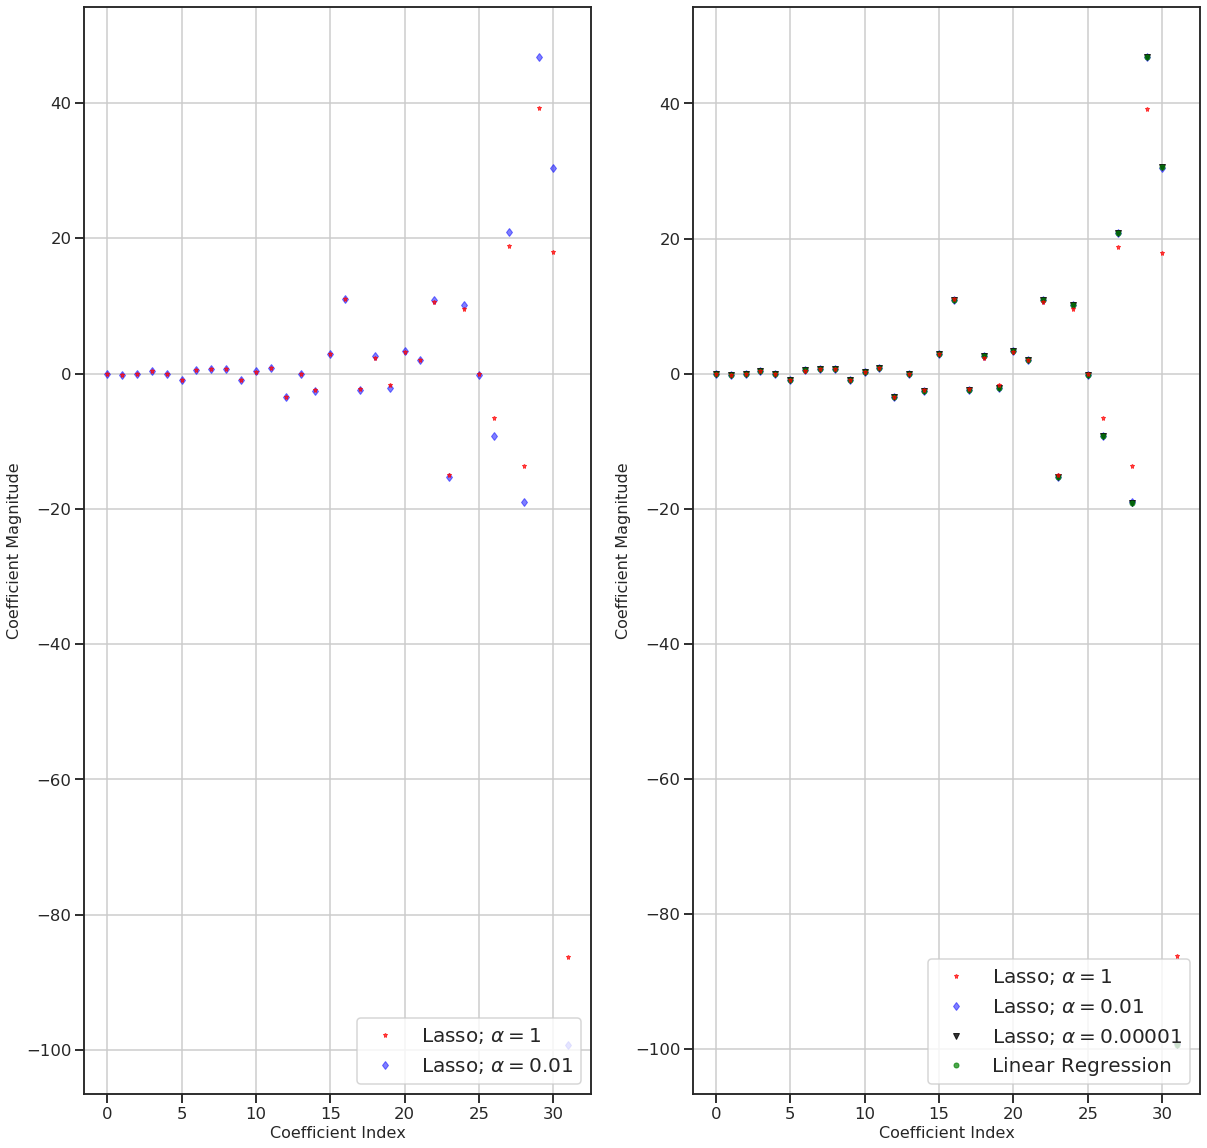

In [144]:
X = FinalData
Y = AirbnbData['Number of Listings']


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=31)

lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)

train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

print ("training score for alpha=0.01:", train_score001) 
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)

lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)

train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

print ("training score for alpha=0.0001:", train_score00001) 
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

print ("LR training score:", lr_train_score )
print ("LR test score: ", lr_test_score)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,20))


ax[0].plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
ax[0].plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

ax[0].set_xlabel('Coefficient Index',fontsize=16)
ax[0].set_ylabel('Coefficient Magnitude',fontsize=16)
ax[0].legend(fontsize=20,loc=4)

ax[1].plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency

ax[1].plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

ax[1].plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency

ax[1].plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)

ax[1].set_xlabel('Coefficient Index',fontsize=16)
ax[1].set_ylabel('Coefficient Magnitude',fontsize=16)
ax[1].legend(fontsize=20,loc=4)
